# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

##Funtions:

#ECDF function for normal distribution comparison
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

#function to resample the data
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

#function to create bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] =bootstrap_replicate_1d(data,func)
    return bs_replicates

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
print(sum(data[data.race=='b'].call))
# number of callbacks for white-sounding names
print(sum(data[data.race=='w'].call))

157.0
235.0


In [4]:
data.head()
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2435 2435


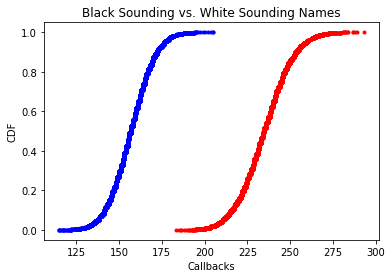

In [5]:
np.random.seed(42)
#grab white sounding names and black sounding names and put them into their own df's
w = data[data.race=='w']
b = data[data.race=='b']

#print out number of trials for each
wn = len(w)
bn = len(b)

print(wn, bn)

#grab number of successes (calls = 1) for each array
ws = np.sum(w.call == 1)
bs = np.sum(b.call == 1)

#calculate percent of successes out of trials (sample proportion)
wp = ws/len(w)
bp = bs/len(b)

# Sample out of a binomial distribution using number of samples (len of w and b arrays) 
#and probability of success calls/len: w_samples, b_samples
w_samples = np.random.binomial(wn, wp, size=10000)
b_samples = np.random.binomial(bn, bp, size=10000)

wx_theor, wy_theor = ecdf(w_samples)
bx_theor, by_theor = ecdf(b_samples)

_ = plt.plot(wx_theor, wy_theor, marker='.', linestyle='none', color='red')
_ = plt.plot(bx_theor, by_theor, marker='.', linestyle='none', color='blue')
_ = plt.title('Black Sounding vs. White Sounding Names')
_ = plt.xlabel('Callbacks')
_ = plt.ylabel('CDF')


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

The appropriate test would a two proportion Z-test.

For these trials a success or callback would be a 1 and a failure or no call back would be a 0.  This is considered a Bernoulli trial and these samples are binomial distributions.  Because the number of trials for each category is sufficiently large the central limit theorem allow us to approximate this binomial distribution using the normal distribution.

Null hypothesis: Proportion for black sounding names minus proportion for white sounding names equals 0 (there is not difference)

Alternate hypothesis : Proportion for black sounding names minus proportion for white sounding names does not equal 0 (there is a difference)


In [76]:
# Your solution to Q3 here

######Frequentist Approach
print("Frequentist Approach: \n")

##compute a 95% confidence interval

#sample proportion one minus sample proportion two
sample_difference = wp - bp
print("The difference in proportions of the samples", sample_difference)

#calculate standard deviation
varw = (wp*(1-wp))/wn
varb = (bp*(1-bp))/bn

sd = np.sqrt(varw + varb)

#from z-table for 97.5%
zvalue = 1.96

#calculate confidence interval
distance = sd * zvalue
high = sample_difference + distance
low = sample_difference - distance
print("We can be 95% confidence that our difference in proportions is within", round(low,3) ," - ", round(high,3))

##compute margin of error
moeH = sample_difference - high
moeL = sample_difference - low

print("Margin of Error: ",round(moeH,3), round(moeL,3))

##calculate the p-value

#calculate proprotion of successes
ps = (ws + bs) / (wn + bn)

#calculate standard error of the difference
se = np.sqrt((ps*(1-ps)/wn) + (ps*(1-ps)/bn))

#assuming the null hypothesis is true our assumed mean is 0
Zscore = (sample_difference - 0)/se

#calculae p value for area above and below the Zscore
pvalue = stats.norm.cdf(Zscore)
pvalue = 1 - pvalue
#adjust for two tailed test
pvalue = pvalue * 2
print("P value: ", pvalue)

######Bootstrapping method
print('\nBootstrap method: \n')

##Calculate the P-value

#recreate bernoulli trials to create arrays of successes and failures
w_bernoulli_trials = np.random.binomial(1, wp, size=wn)
b_bernoulli_trials = np.random.binomial(1, bp, size=bn)

#create replicates and calculate the mean of each trial
w_bs_replicates = draw_bs_reps(w_bernoulli_trials, np.mean, size=10000)
b_bs_replicates = draw_bs_reps(b_bernoulli_trials, np.mean, size=10000)

#calculate mean of successes of each trial
w_bs_mean = np.mean(w_bs_replicates)
b_bs_mean = np.mean(b_bs_replicates)

#calculate mean difference of the bootstrap replicates
bs_mean_diff = w_bs_mean - b_bs_mean

#calculate mean difference of observed samples 
w_mean = np.mean(ws)
b_mean = np.mean(bs)

#calculate empirical difference of mean
mean_diff = w_mean - b_mean

#calculate percent of successes of each trial
w_bs_s = w_bs_replicates / len(w_bs_replicates)
b_bs_s = b_bs_replicates / len(w_bs_replicates)

#calculate difference of each replicate trial
bs_reps_diff = (w_bs_replicates - b_bs_replicates)

#calculate p-value
bs_p_value = np.sum(bs_mean_diff >= mean_diff) / len(bs_reps_diff)
print("P - value: ", bs_p_value)

##Calculate 95% confidence interval
bs_conf_int = np.percentile(bs_reps_diff, [2.5,97.5])
print("We can be 95% confident that our difference of proportion falls within : ", round(bs_conf_int[0],3)," - ",round(bs_conf_int[1],3))

#calculate margin of error
moeH1 = bs_mean_diff - bs_conf_int[1]
moeL1 = bs_mean_diff - bs_conf_int[0]

print("Margin of Error: ", round(moeH1,3),round(moeL1,3))



Frequentist Approach: 

The difference in proportions of the samples 0.032032854209445585
We can be 95% confidence that our difference in proportions is within 0.017  -  0.047
Margin of Error:  -0.015 0.015
P value:  3.983886837577444e-05

Bootstrap method: 

P - value:  0.0
We can be 95% confident that our difference of proportion falls within :  0.016  -  0.046
Margin of Error:  -0.015 0.015


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

According to the Frequentist approach calculatieon we have a P value of less than 0.05 so we can reject the null hypothesis that
the proportion of callbacks for those with white sounding names is equal to those with black sounding names.  The same goes for the bootstrap approch with a P-value of 0.0.  Both of these analysis show that there are significantly less callbacks for those with black sounding names.  

The study claims that on the resumes selected only the names were changed so this  is a rather convincing argument from the data gathered above for a true bias between callbacks for white sounding vs black sounding names.  Although it would be helpful to compare other factors from the samples such as years of experience or education for a more thorough analysis.
